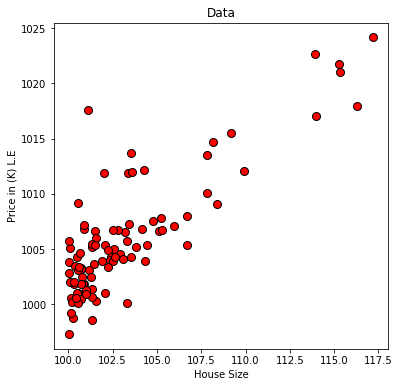

In [ ]:
import numpy as np                          
import matplotlib.pyplot as plt             
from IPython.display import HTML
import pandas as pd

%matplotlib inline

Data = np.genfromtxt(r'House_Price.csv', delimiter=',')
iterations = 100


X = np.array(Data[:,0])
Y = np.array(Data[:,1])
X = X.reshape(X.shape[0],-1)
Y = Y.reshape(Y.shape[0],-1)

plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)

In [ ]:
print('Data : ')
print(Data[:4])

print('\n X : ')
print(X[:4])

print('\n Y : ')
print(Y[:4])

Data : 
[[ 101.1101 1017.592 ]
 [ 100.5277 1009.1302]
 [ 103.5186 1013.662 ]
 [ 102.0032 1011.854 ]]

 X : 
[[101.1101]
 [100.5277]
 [103.5186]
 [102.0032]]

 Y : 
[[1017.592 ]
 [1009.1302]
 [1013.662 ]
 [1011.854 ]]


In [ ]:
def Predictive_Line(X, Theta):

    Predictions = None
    X = np.append(np.ones((1,X.shape[0])), X.reshape((1,X.shape[0])), axis = 0)

    Predictions=np.dot(Theta.T,X)
  
    Predictions = Predictions.T
    return Predictions

In [ ]:
P = Predictive_Line(X,Theta = np.array([955, 0.4]).reshape((2,1)))
print(P[:5])

[[995.44404]
 [995.21108]
 [996.40744]
 [995.80128]
 [995.34392]]


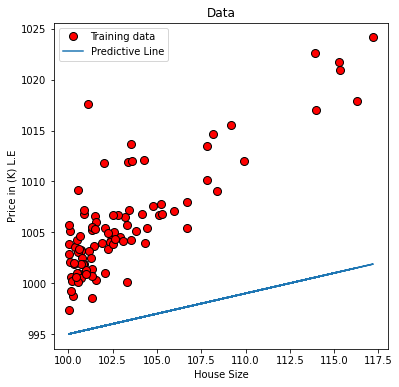

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);

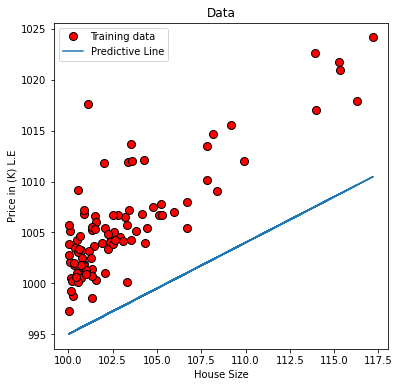

In [ ]:
P = Predictive_Line(X = X,Theta = np.array([905, 0.9]).reshape((2,1)))

plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);

In [ ]:
def Calculate_Cost(X, Theta, Y):
    m = Y.shape[0]
    J = 0
    PL=Predictive_Line(X, Theta)
    J=((1/(2*m))*np.sum(np.square(PL-Y),axis=0))


    return J

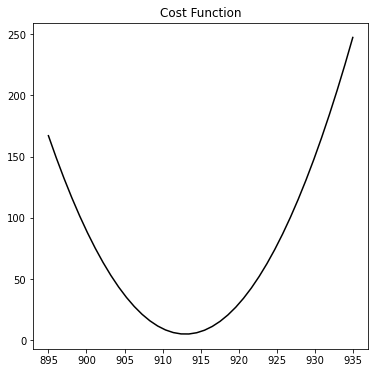

In [ ]:
Theta0_Grid = np.linspace(895,935,num = 40)
Theta1_Grid = np.ones(len(Theta0_Grid)) * 0.9
Theta0_Grid = Theta0_Grid.reshape((Theta0_Grid.shape[0],-1))
Theta1_Grid = Theta1_Grid.reshape((Theta1_Grid.shape[0],-1))
Theta = np.append(Theta0_Grid, Theta1_Grid, axis = 1)
J_grid = Calculate_Cost(X= X, Theta = Theta.T , Y = Y)
plt.figure(figsize=(6, 6))
plt.plot(Theta0_Grid, J_grid, 'k')
plt.title('Cost Function')
plt.grid(False)


In [ ]:
def Gradient_Descent(X, Y, Theta, alpha, num_iters):

    m = Y.shape[0]  
    X1 = np.append(np.ones(X.shape),X, axis = 1)   
    for i in range(num_iters):
      PL=Predictive_Line(X, Theta.T)
      Theta=Theta-(alpha/m)*((PL-Y).T).dot(X1)

    
    return Theta

In [ ]:
Theta = Gradient_Descent(X, Y, Theta = np.array([900,0.4]).reshape((1,2)), alpha = 0.0001,num_iters= 10000)

P = Predictive_Line(X, Theta)

Cost = Calculate_Cost(X, Theta.T, Y)
print('Theta = ' + str(Theta))
print( 'Cost = '+str(Cost))

Theta = [[899.98210241   1.02637825]]
Cost = [4.6830858]


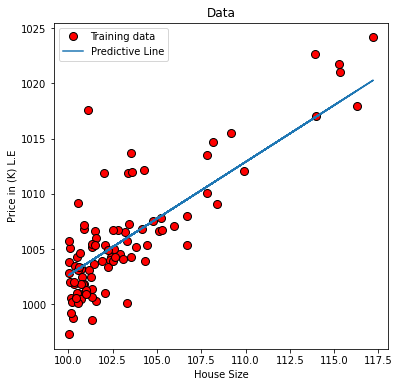

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);

In [ ]:
from scipy import linalg

def Normal_Equation(X,Y):
  X1 = np.append(np.ones(X.shape) , X, axis = 1)
  Theta = linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(Y).T
  return Theta

In [ ]:
Theta = Normal_Equation(X,Y)
Theta = Theta.reshape((2,1))
P = Predictive_Line(X, Theta)

Cost = Calculate_Cost(X, Theta, Y)
print('Theta = ' + str(Theta))
print( 'Cost = '+str(Cost))

Theta = [[882.76602292]
 [  1.19303364]]
Cost = [4.47697138]


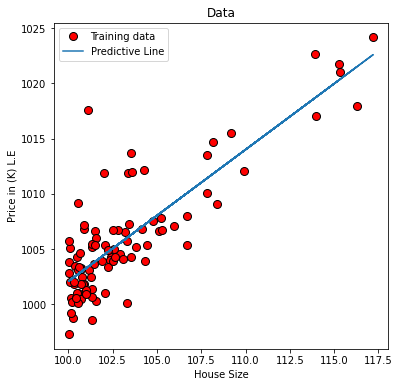

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);